# Exercise 05

## Demographic Prisoner's Dilemma

The Demographic Prisoner's Dilemma is a family of variants on the classic two-player [Prisoner's Dilemma](https://en.wikipedia.org/wiki/Prisoner's_dilemma), first developed by [Joshua Epstein](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.8.8629&rep=rep1&type=pdf). The model consists of agents, each with a strategy of either Cooperate or Defect, playing against each neighbour in the Moore-neighbourhood. Each agent's payoff is based on its strategy and the strategies of its spatial neighbors. After each step of the model, the agents adopt the strategy of their neighbor (or their own) with the highest total score. 

The specific variant presented here is adapted from the [Evolutionary Prisoner's Dilemma](http://ccl.northwestern.edu/netlogo/models/Prisoner'sDilemmaBasicEvolutionary) model included with NetLogo. Its payoff table is a slight variant of the traditional PD payoff table:

<table>
    <tr><td></td><td>Cooperate</td><td>Defect</td></tr>
    <tr><td>Cooperate</td><td>1, 1</td><td>0, D</td></tr>
    <tr><td>Defect</td><td>D, 0</td><td>0, 0</td></tr>
</table>

Where *D* is the defection bonus, generally set higher than 1. In these runs, the defection bonus is set to $D=1.6$.

The Demographic Prisoner's Dilemma demonstrates how simple rules can lead to the emergence of widespread cooperation, despite the Defection strategy dominating each individual interaction game. However, it is also interesting for another reason: it is known to be sensitive to the activation regime employed in it.

Below, we demonstrate this by instantiating the same model (with the same random seed) three times, with three different activation regimes: 

* Sequential activation, where agents are activated in the order they were added to the model;
* Random activation, where they are activated in random order every step;
* Simultaneous activation, simulating them all being activated simultaneously.



In [1]:
import sys
sys.path.insert(0,'task02/pd_grid')
from pd_grid.model import PdGrid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec
from matplotlib.colors import LinearSegmentedColormap
from mesa.visualization import show_logs, freeze_logs

%matplotlib inline
matplotlib.rcParams['font.size'] = 12

## Helper functions

In [2]:
uniks = LinearSegmentedColormap.from_list( 'unik', [np.array((80,149,200))/255, np.array((74,172,150))/255,
                                                  np.array((234,195,114))/255, np.array((199,16,92))/255])

def draw_grid(model, ax=None):
    """
    Draw the current state of the grid, with Defecting agents in red
    and Cooperating agents in blue.
    """
    if not ax:
        fig, ax = plt.subplots(figsize=(6, 6))
    grid = np.zeros((model.grid.width, model.grid.height))
    for agent, (x, y) in model.grid.coord_iter():
        if agent.move == "D":
            grid[y][x] = 1
        else:
            grid[y][x] = 0
    ax.pcolormesh(grid, cmap=uniks, vmin=0, vmax=1)
    ax.axis("off")
    ax.set_title("Steps: {}".format(model.schedule.steps))

In [3]:
def draw_score_grid(model, ax=None, minvalue=None, maxvalue=None):
    """
    Draw the current state of the grid, with Defecting agents in red
    and Cooperating agents in blue.
    """
    if maxvalue == None:
        maxvalue = max(model.schedule.agents, key=lambda agent: agent.score).score
    if minvalue == None:
        minvalue = min(model.schedule.agents, key=lambda agent: agent.score).score
    if not ax:
        fig, ax = plt.subplots(figsize=(6, 6))
    grid = np.zeros((model.grid.width, model.grid.height))
    for agent, (x, y) in model.grid.coord_iter():
        grid[y][x] = agent.score
    fig = ax.pcolormesh(grid, vmin=minvalue, vmax=maxvalue)
    ax.axis("off")
    plt.colorbar(fig)
    ax.set_title("Step: {}".format(model.schedule.steps))

In [4]:
def run_model(model, steps = [10,10,20,20,40], maxscorevalue = None):
    """
    Run an experiment with a given model, and plot the results.
    """
    fig = plt.figure(figsize=(12, 8))

    for i in range(0, len(steps)):
        draw_grid(model, fig.add_subplot(3, len(steps) + 1, i + 1 ))
        draw_score_grid(model, fig.add_subplot(3, len(steps) + 1, i + 2 + len(steps)), maxvalue=maxscorevalue)
        model.run(steps[i])
        
    draw_grid(model, fig.add_subplot(3, len(steps) + 1, i + 2 ))
    draw_score_grid(model, fig.add_subplot(3, len(steps) + 1, i + 3 + len(steps)), maxvalue=maxscorevalue)
    
    ax = fig.add_subplot(3, 1, 3)

    d = model.datacollector.get_model_vars_dataframe()
    d = d * 100 / model.schedule.get_agent_count()
    d.plot(ax=ax, colormap=uniks)
    

In [5]:
def compare_runs(models):
    data = pd.DataFrame()
    for model in models:
        modeldata = model.datacollector.get_model_vars_dataframe() * 100 / model.schedule.get_agent_count()
        modeldata.columns = [model.schedule_type]
        data = pd.concat([data, modeldata],axis=1)
        
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(111)
    data.plot(ax=ax1, colormap=uniks)
    fig.savefig("dpd_compare.png")

## Subtask 2.2

Explain the different evolution of cooperators for random and simultaneous activation schemes by exploring the warm-up phase. Why does for some random seeds the number of cooperators go down before it raises, but not for sequential? (< 300 words)

# random activation
In the random activation scheme, the agents are activated in random order every step. This means that the agents are not activated in the same order every time. 
This randomness can lead to different results for different random seeds. 
An agent can play against other agents which have not been activated this trial and thus, use their old strategy. 
In the warm-up phase, the number of cooperators can go down before it raises because of the randomness in the activation order. The agents that are activated first can be surrounded by defectors, which can lead to them defecting as well. 
This can cause a chain reaction where more and more agents defect. 
However, the number of cooperators can also go up in the warm-up phase because the agents that are activated first can be surrounded by cooperators. This can lead to them cooperating as well, which can cause a chain reaction where more and more agents cooperate.
- All agents cooperate for a seed == 25.
- Step 2-4 (seed == 25): extreme change (increase in number of cooperating agents).
- pd_grid/agent.py, l.55: use next_move (evaluated based on the current state of the grid) to determine the next move of the agent & act according to this move.
- for seeds 0-9: 
    - 3 x cooperation at the end
    - 7 x defection at the end
    - seed 1 and 2: number of cooperators goes down before it raises
If the number of cooperators goes down before it raises, the agents that are activated first are most likely cooperators.
If there are cooperators among their neighbours, they will receive a reward and most likely keep cooperating.
Since they are activated first, their cumulative score can be higher than the scores of the agents that are activated later.
Thus, the number of cooperators will increase over time.
If deflectors are activated first, they will most likely keep defecting, since they will receive a reward if they play against a cooperator.
Cooperators activated later will most likely adapt their strategy to defect and thus, the number of defectors decreases.


# simultaneous activation
In the simultaneous activation scheme, all agents are activated simultaneously. 
This means that all agents are activated at the same time and update their next move based on the same grid version. 
There are no regions of high scores (only singular patches) as observed in the random activation scheme.
Since the all agents deflect from early on, no reward is earned. 
Hence, the total score no longer increases with increasing number of steps.
Possibly, the individual optimum score can be adchieved by defecting (if surrounding agents cooperate).
If (coop, def) is played, the defector gets a reward of 1.6, while the cooperator gets 0.
Thus, based on only this event, the agents adapt to a defecting strategy.
Hence, the agents defect from early on.
- step 1-2: extreme change
- result is the same for all seeds (checked for seeds 0-9, 25)

#### Run DPD in browser

In [6]:
from app import page
page

Cannot show ipywidgets in text

### Warm-up: Random activation

Passing `printneighbourscore=True` to model initialisation prints score and `printneighbourorder=True` prints move information about the focal (passing `focalpos=(0,0)`) agents' neighbours. The order of neighbours is row-wise (eg. starting with upper left, then upper middle, upper right, middle left aso.)

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

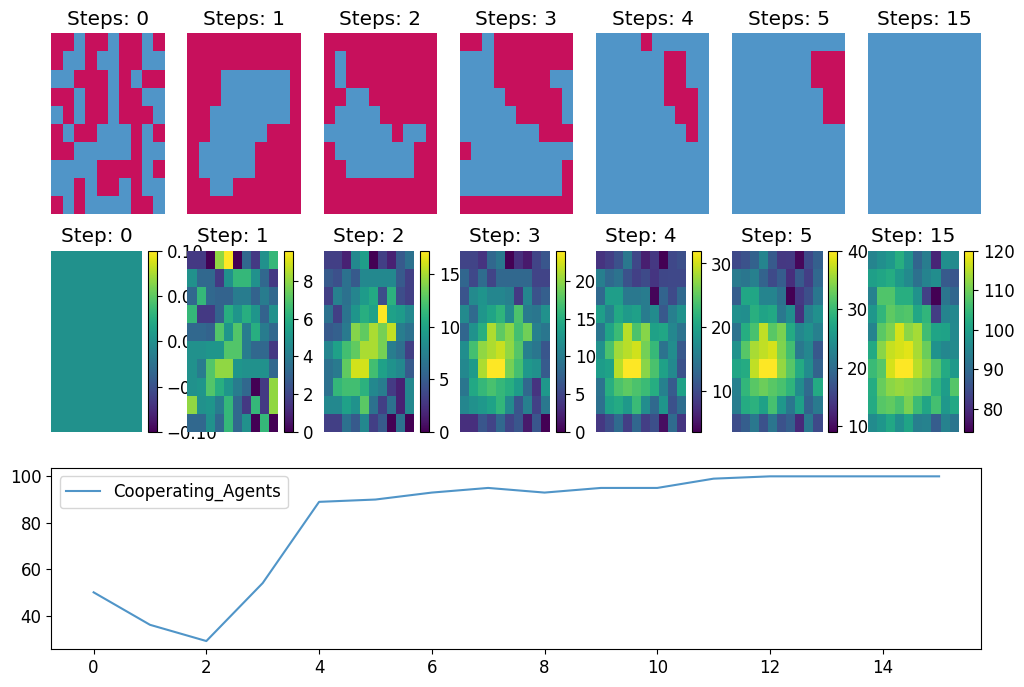

In [7]:
show_logs("DPD")
i = 25
m_random = PdGrid(10, 10, "Random", seed=i, printneighbourscore=True, printneighbourorder=True, focalpos=(2,1))
run_model(m_random, steps = [1,1,1,1,1,10])
freeze_logs("DPD")

### Warm-up: Simultaneous Activation

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

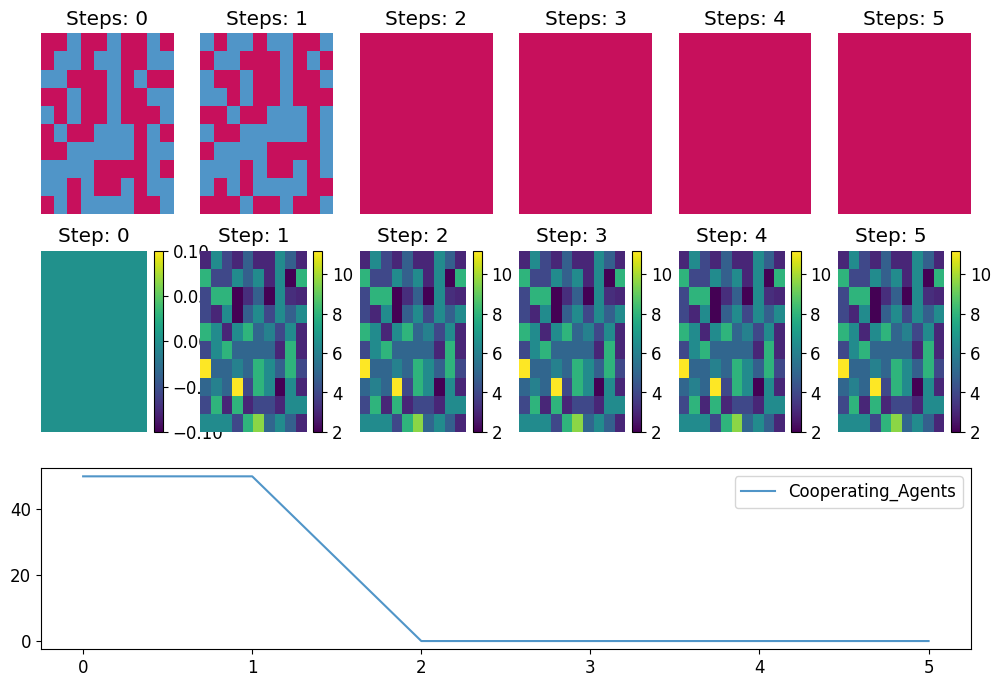

In [8]:
show_logs("DPD")
m_simultaneous = PdGrid(10, 10, "Simultaneous", seed=i, printneighbourscore=True, printneighbourorder=True, focalpos=(9,9))
run_model(m_simultaneous, steps = [1,1,1,1,1])
freeze_logs("DPD")

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

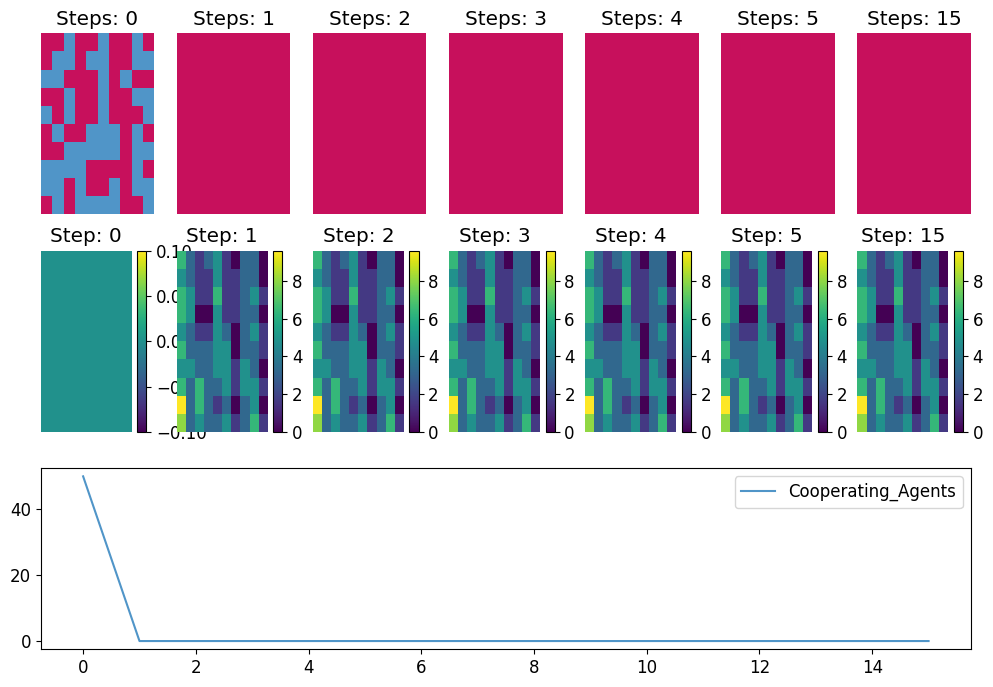

In [9]:
#for i in range(10):
show_logs("DPD")
m_sequential = PdGrid(10, 10, "Sequential", seed=i, printneighbourscore=True, printneighbourorder=True, focalpos=(2,1))
run_model(m_sequential, steps = [1,1,1,1,1,10])
freeze_logs("DPD")

### Compare runs

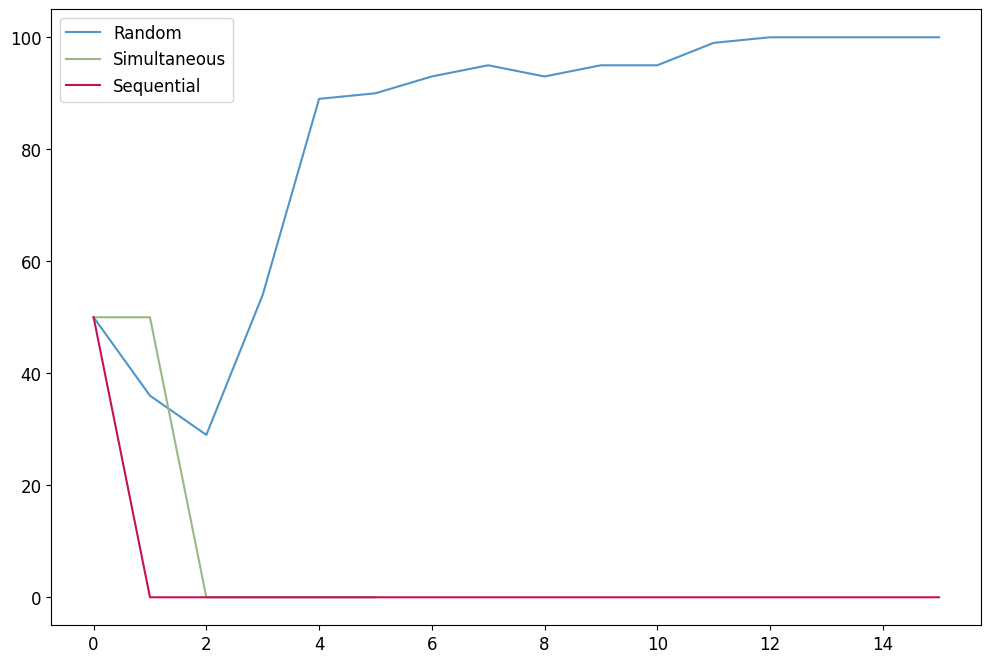

In [10]:
matplotlib.rcParams['font.size'] = 12
compare_runs([m_random, m_simultaneous, m_sequential])

## Subtask 2.3

**Discuss the different activation schemes in light of possible model purposes in general and in particular to the DPD. Which one would you chose, and which not (<200 words)?**

# random activation
The random activation scheme is useful if the order of activation does not matter.
It can be used to simulate a more realistic scenario where agents are activated in random order.
This can lead to different results for different random seeds.
In the case of the DPD, the random activation scheme can be useful to simulate a more realistic scenario where agents are different groups of people with different strategies.
It could also be used to simulate an average case scenario.
In general, the random activation is realistic and to my mind, the most useful activation scheme for DPD.

# sequential activation
The sequential activation scheme is useful if the order of activation matters.
In the case of the DPD, the sequential activation scheme produces a convergence after one step.
The result can be read from the initial state of the upper right cell of the grid.
In case of the DPD, the sequential activation scheme is not useful, since it is deterministic.
I did not find any specific use case for the sequential activation scheme in general.
It could be used to encode a specific order of activation, if their is an order (priority) order in the agents.

# simultaneous activation
The simultaneous activation scheme is useful if the order of activation does not matter and all agents should be activated at the same time.
In the case of the DPD, the simultaneous activation scheme produces the same result for all random seeds.
This can either be interpreted as a limitation of the model or as the overall optimal strategy.
In the case of supermarket queues (a few excericises ago), the simultaneous activation scheme would not be useful to simulate a realistic scenario where all agents are activated at the same time.
Hence, the simultaneous activation scheme is only applicable to certain scenarios.
One use case could be the simulation of a bird flock, where all birds are activated at the same time (cf. lecture).


## Subtask 3.1
**Make yourself familiar with running batch runs with the Evacuation model (remember the [mesa tutorial](https://mesa.readthedocs.io/en/latest/tutorials/intro_tutorial.html#batch-run)). Why is the `iterations` parameter important?**

The purpose of running batches is to try different parameter combinations and to see how the model behaves under different conditions. 
The `iterations` parameter is important because it specifies how many times the model should be run for each parameter combination.
The default value is 1, which means that the model is only run once for each parameter combination.
This is important because some models are stochastic (influenced by random events) and the results can vary between runs. 
By running the model multiple times for each parameter combination, we can get a better idea of the average behavior of the model under those conditions. 
The results can be considered stochastically significant if the model is run multiple times and the results are consistent across runs.
However, by increasing the number of iterations, the computational cost of the batch run increases as well.

## Subtask 3.2

**Conduct batch runs with variations in `cooperation_mean` and `nervousness_mean` and analyse and discuss the results by adopting the provided code in the jupyter notebook. What effect has an extension of the seed-range, e.g. to`range(1,100)`? Which important statistics formula is relevant (<200 words)?**

# Batch runs with variations in cooperation_mean and nervousness_mean
In the course of the batch runs, the evacuation time is measured for different values of cooperation_mean and nervousness_mean.
When the both the cooperation_mean and the nervousness_mean are high the evacuation time is low.
On the other hand, if the cooperation_mean is low and the nervousness_mean is high the evacuation time is high.
Similarly, if cooperation_mean is low and nervousness_mean is low the evacuation time is high.
Hence, I wonder whether the cooperation_mean has a higher impact on the evacuation time than the nervousness_mean.

# Batch runs with variations in seed-range
More seeds are used to get a better idea of the average behavior of the model under those conditions.
For the batch runs, the seed-range is extended to range(0,10).
In general, there are many evactuation runs that were fast (i.e. dark patch) and few slow ones (i.e. yellow patch).
The fast evactuations occur in clusters, while some of the slow ones are scattered.

In [11]:
from mesa.batchrunner import batch_run
from mesa.visualization import show_logs, freeze_logs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
sys.path.insert(0,'../../abmodel')

from fire_evacuation.model import FireEvacuation
from fire_evacuation.agent import Human

Note that the simulation may take a few minutes to terminate!

In [12]:
from IPython.utils import io
        
params = dict(
    floor_size=10,
    human_count=40,
    alarm_believers_prop = 1.0,
    cooperation_mean = np.arange(0.1,0.7,0.1),
    nervousness_mean = np.arange(0.1,0.7,0.1),
    seed = range(1,100),
)

# uncomment to run the model, since it takes a long time (never finishes) otherwise 
#with io.capture_output() as captured:
#    show_logs("FireEvacuation")
results = batch_run(
    FireEvacuation,
    parameters=params,
    iterations=7,
    max_steps=100,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)
#    freeze_logs("FireEvacuation")

  0%|          | 0/24948 [00:00<?, ?it/s]

In general, the mean and standard deviation are relevant statistics formulas.
When conducting batch runs, the mean can be used to determine the average behavior of the model under different conditions, whereas the standard deviation can be used to determine how much the results vary between runs.
The more batches are run, the more accurate the mean and standard deviation will be.

# Analysis of results 

Mean_nervousness = mean of gaussian which is used to sample the inital nervousness value of the agents.

## Subtask 3.3

**Formulate a plausible numerical definition of a panic during the evacuation. Consider the proportion of escaped individuals and time. Can you change the output of batch_run to check your criteria (you don’t have t implement this, but your’re free to do so)?**

proportion of escaped individuals and time:
Number of escaped individuals / time

where time is the step of the iteration

In [13]:
df_escaped_per_time = pd.DataFrame(results)
df_escaped_per_time.insert(0, "escaped_per_time", df_escaped_per_time["NumEscaped"] / df_escaped_per_time["Step"])
df_escaped_per_time.fillna(0, inplace=True)
data = df_escaped_per_time.round(decimals=1)    # readable format
display(data)

,escaped_per_time,RunId,iteration,Step,floor_size,human_count,alarm_believers_prop,cooperation_mean,nervousness_mean,seed,NumEscaped,AvgNervousness,AvgSpeed
0,0.0,0,0,0,10,40,1.0,0.1,0.1,1,0,0.1,0.7
1,0.0,0,0,1,10,40,1.0,0.1,0.1,1,0,0.0,0.8
2,0.5,0,0,2,10,40,1.0,0.1,0.1,1,1,0.0,0.8
3,1.7,0,0,3,10,40,1.0,0.1,0.1,1,5,0.0,0.8
4,2.5,0,0,4,10,40,1.0,0.1,0.1,1,10,0.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
621995,0.7,24947,6,54,10,40,1.0,0.6,0.6,99,36,0.0,0.0
621996,0.7,24947,6,55,10,40,1.0,0.6,0.6,99,36,0.0,0.0
621997,0.6,24947,6,56,10,40,1.0,0.6,0.6,99,36,0.0,0.0
621998,0.6,24947,6,57,10,40,1.0,0.6,0.6,99,36,0.0,0.0


the feature escaped_per_time does not yet reflect a general trend.
In order to change that, I would suggest to calculate the mean of these values for a specific step at a cooperation_mean and nervousness_mean combination over different iterations.

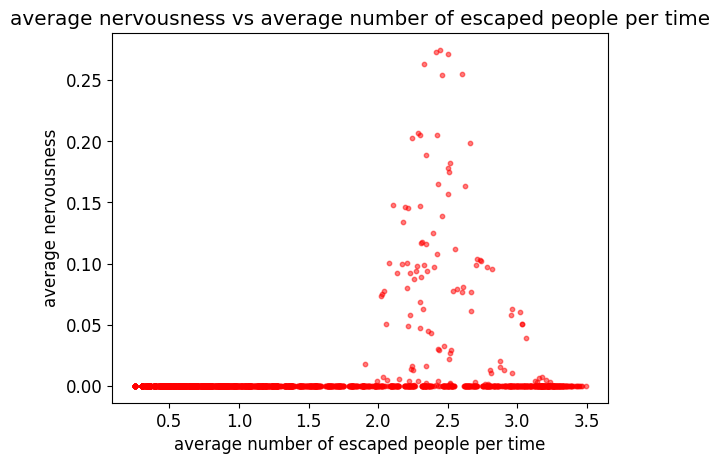

In [14]:
df = data.groupby(['cooperation_mean', 'nervousness_mean', "Step"]).agg("mean") # average over iterations

# plot the average number of escaped people per time step
plt.title("average nervousness vs average number of escaped people per time")
plt.scatter(df["escaped_per_time"].values, df["AvgNervousness"].values, c='red', alpha=0.5, s=10)
plt.xlabel("average number of escaped people per time")
plt.ylabel("average nervousness")
plt.show()

There is no linear relationship between the proportion of escaped individuals and time.
One would expect the number of escaped individuals to increase or increase with rising average nervousness but there is no clear trend.
Hence, the proportion of escaped individuals and time is not a good indicator for panic during the evacuation.

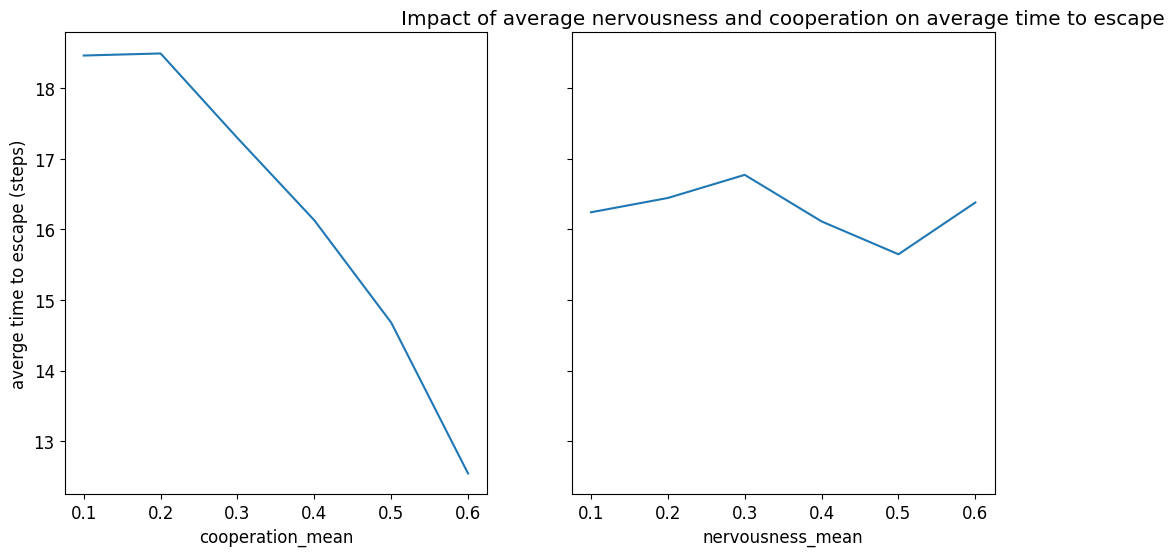

In [15]:
data = data[['cooperation_mean', 'nervousness_mean','Step','iteration']]
df = data.groupby(['cooperation_mean', 'nervousness_mean','iteration']).agg("max")  # longest time (steps) to escape 
df = data.groupby(['cooperation_mean', 'nervousness_mean']).agg("mean") # average over iterations of max time to escape
df = df.drop(columns=["iteration"])
cooperation_df = df.groupby(['cooperation_mean']).agg("mean")
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
ax1.plot(cooperation_df)
ax1.set(xlabel="cooperation_mean", ylabel="averge time to escape (steps)")

nervousness_df = df.groupby(['nervousness_mean']).agg("mean")
ax2.plot(nervousness_df)
ax2.set(xlabel="nervousness_mean", ylabel="averge time to escape (steps)")
ax2.label_outer()
plt.title("Impact of average nervousness and cooperation on average time to escape")
plt.show()

It is clear that the average time to evacuate is lower for higher cooperation_mean.
However, the nervousness_mean either does not have a significant impact on the evacuation time or there is a sweet spot at around 0.5 nervousness_mean where evacuation time is at its lowest.

The only thing left to do is to check whether certain combinations of cooperation_mean and nervousness_mean lead to a panic (and thus, slower evacuation) during the evacuation.

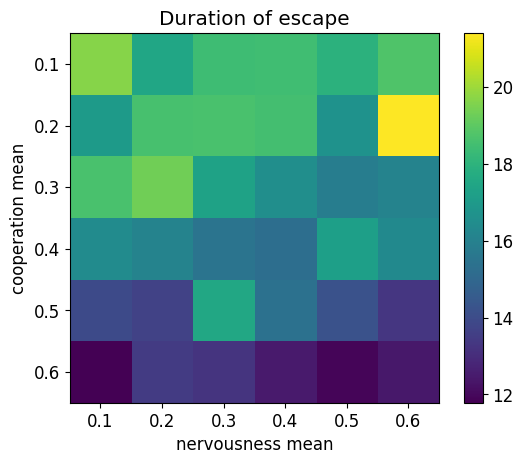

In [16]:
# use df: average over iterations of max time (steps) to escape
heatmap_df = (df.reset_index().pivot(index='cooperation_mean', columns='nervousness_mean'))
fig, ax = plt.subplots()
img = ax.imshow(heatmap_df)
plt.colorbar(img)
plt.xlabel('nervousness mean')
plt.ylabel('cooperation mean')
plt.title("Duration of escape")
ax.set_xticks(np.arange(heatmap_df.shape[1]))
ax.set_xticklabels(sorted(set(round(data['nervousness_mean'], ndigits=1))))
ax.set_yticks(np.arange(heatmap_df.shape[0]))
ax.set_yticklabels(heatmap_df.index)
None

For a low cooperation_mean (e.g. 0.2) and a high nervousness_mean (e.g. 0.6), the evacuation time is high.
For a high cooperation_mean (e.g. 0.6) irrespective of the nervousness_mean, the evacuation time is low.
For a low cooperation_mean (e.g. <= 0.3) irrespective of the nervousness_mean, the evacuation time is high.
Thus, the cooperation_mean has a higher impact on the evacuation time than the nervousness_mean.

Instead of altering data_collection_period, I postprocessed the data since I have to rerun the simulation less often.
I downsampled the data to receive the maximum number of steps necessary to escape for each combination of cooperation_mean and nervousness_mean.

It is difficult to define a panic during the evacuation based on numerical properties.
My attempt is the following:
There are two types of panic:
An individual panic is present if the agent's individual nervouseness is higher than the threshhold.
If we consider a panic as a group phenomenon present if the group evactuation time exceeds a certain threshold, we can define a group panic as follows:
A group panic is present if the number of steps necessary to escape exceeds 16 (about the upper fifth of the heatmap legend maximum number 20). 
Hence, a cooperation_mean of 0.3 or lower irrespective of the nervousness_mean leads to a group panic.

## Subtask 3.4

**Discuss whether your notion of panic fulfils the criteria for an emergent phenomenon or whether it is imposed.**

This criteria is imposed since the notion of panic is defined by the researcher AFTER considering the plots/ visual and numerical analysis of the data.
The phenomenon of panic is not an emergent phenomenon since it is not a result of the model itself but rather a result of the researcher's interpretation of the data.